<a href="https://colab.research.google.com/github/YesithW/YesithW/blob/main/SCARA_workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

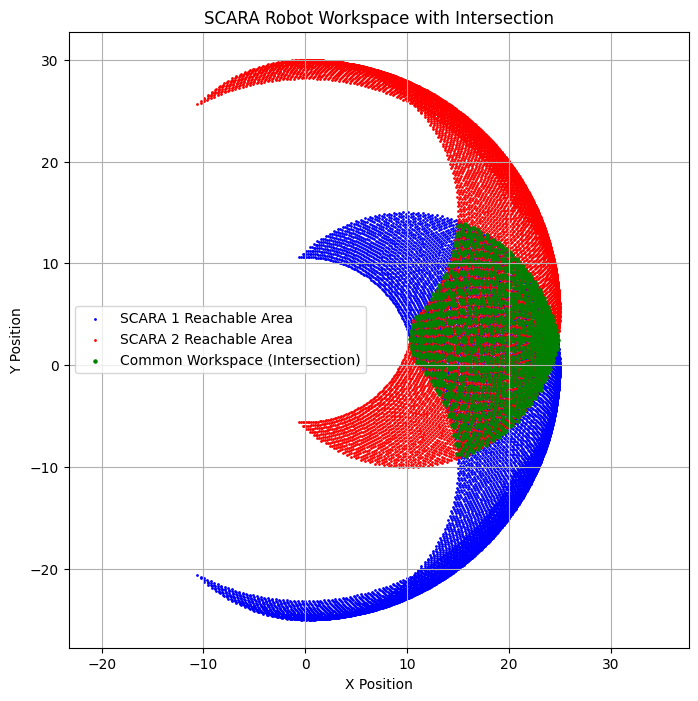

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree  # Efficient nearest-neighbor search

# Define SCARA 1 parameters
L1 =10.0 # Length of first link (First SCARA)
L2 = 15.0  # Length of second link (First SCARA)
theta11_min, theta11_max = np.radians([-90, 0])  # Joint 1 limits
theta21_min, theta21_max = np.radians([-45, 135])  # Joint 2 limits

# Define SCARA 2 parameters
L3 = 10.0  # Length of first link (Second SCARA)
L4 = 15.0  # Length of second link (Second SCARA)
theta12_min, theta12_max = np.radians([0, 90])  # Joint 1 limits
theta22_min, theta22_max = np.radians([-135, 45])  # Joint 2 limits

# Offset for second SCARA
X0 = 0
Y0 = 5

# Define resolution
theta11_values = np.linspace(theta11_min, theta11_max, 100)
theta21_values = np.linspace(theta21_min, theta21_max, 100)

theta12_values = np.linspace(theta12_min, theta12_max, 100)
theta22_values = np.linspace(theta22_min, theta22_max, 100)

reachable1 = []  # Store (x, y) for SCARA 1
reachable2 = []  # Store (x, y) for SCARA 2

# Compute reachable positions for first SCARA arm
for theta11 in theta11_values:
    for theta21 in theta21_values:
        x = L1 * np.cos(theta11) + L2 * np.cos(theta11 + theta21)
        y = L1 * np.sin(theta11) + L2 * np.sin(theta11 + theta21)
        reachable1.append((x, y))

# Compute reachable positions for second SCARA arm
for theta12 in theta12_values:
    for theta22 in theta22_values:
        x = L3 * np.cos(theta12) + L4 * np.cos(theta12 + theta22) + X0
        y = L3 * np.sin(theta12) + L4 * np.sin(theta12 + theta22) + Y0
        reachable2.append((x, y))

# Convert lists to NumPy arrays
reachable1 = np.array(reachable1)
reachable2 = np.array(reachable2)

# Use KDTree for fast intersection finding
tree = cKDTree(reachable2)
tolerance = 0.1
matches = tree.query_ball_point(reachable1, tolerance)

# Extract intersection points
inclusion_x = []
inclusion_y = []
for i, match in enumerate(matches):
    if match:  # If a match exists in reachable2
        inclusion_x.append(reachable1[i, 0])
        inclusion_y.append(reachable1[i, 1])

# Plot the workspace
plt.figure(figsize=(8, 8))
plt.scatter(reachable1[:, 0], reachable1[:, 1], s=1, color='blue', label="SCARA 1 Reachable Area")
plt.scatter(reachable2[:, 0], reachable2[:, 1], s=1, color='red', label="SCARA 2 Reachable Area")
plt.scatter(inclusion_x, inclusion_y, s=5, color='green', label="Common Workspace (Intersection)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("SCARA Robot Workspace with Intersection")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()
